In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

### Working through an example from <[Lecture 10 Bayesian Inference]> ###

[Lecture 10 Bayesian Inference]: https://www.youtube.com/watch?v=mDVE0M-xQlc&list=PLruBu5BI5n4aFpG32iMbdWoRVAA-Vcso6&index=1

This notebook is based on the 10th and 11th lecture for Sir David Mackay's course on Information Theory and Bayesian Inference.

We will be working through an example of fitting an exponential distribution using Bayesian Inference 
to a series of data points that are supposed to represent particles emitted from some source. We'd like to infer
Lambda given the data e.g. $${{P(\lambda | x_i, H)}} $$

To do this we use Bayes theorem to set up the RHS of the equation:

$$
\frac{\prod_{i=1}^{N} \left( \frac{1}{Z(\alpha_i, \beta_i)} e^{-\frac{x_i}{\lambda}} \right) \times P(\lambda | H)}{P(x_i | H)}
$$


The first term in the numerator represents our __'likelihood function__' which is $${{P(x | \lambda)}}$$ while the second is our __prior__. This is all divided by our 
normalizing constant. Based on the data, we try to infer lambda which
is the only parameter we need for our exponential function

Here Z is the normalizing constant which is just integrating out x based on our bounds for a given value of lambda. 
$$
Z = \int_{a}^{b} e^{-x/\lambda} \, dx = \frac{1}{\lambda} \left[ e^{-a/\lambda} - e^{-b/\lambda} \right]
$$

Lastly, for this exercise we will use H that x is exponential distributed and 
prob of log lambda is uniformly distributed over 0.1 to 50

Let's implement this in Python!

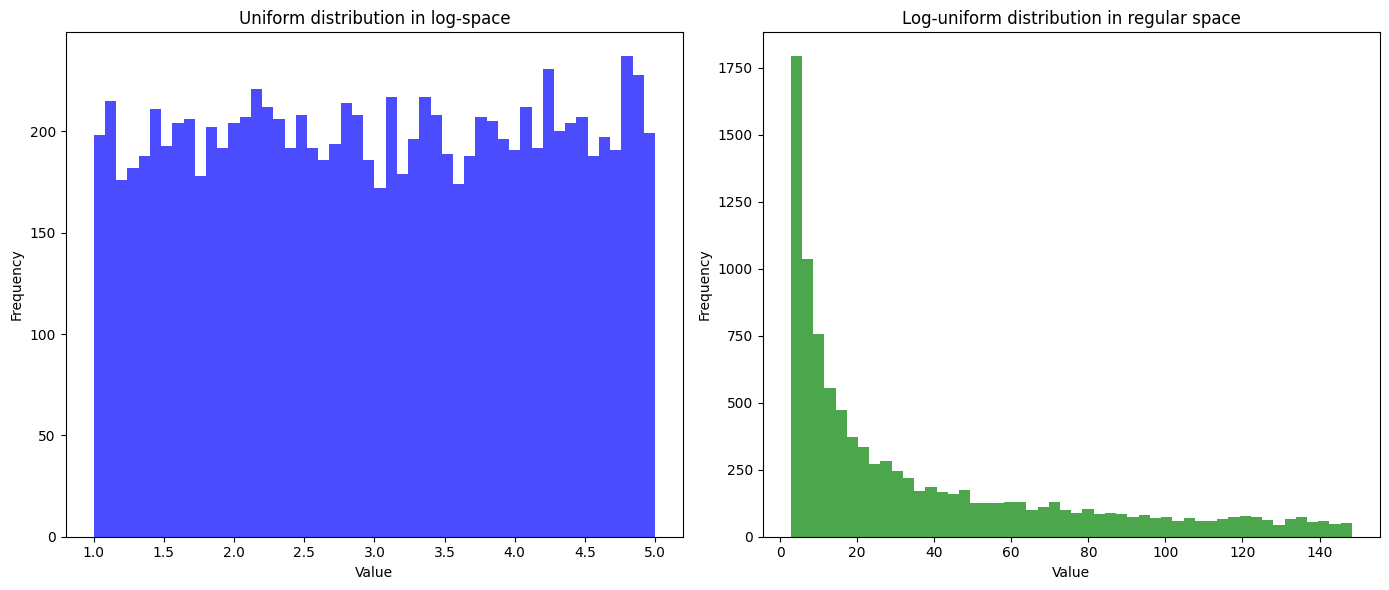

In [19]:
# showing what our log uniform prior might look like 
log_uniform_samples = np.random.uniform(low=1, high=5, size=10000)
regular_space_samples = np.exp(log_uniform_samples)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(log_uniform_samples, bins=50, color='blue', alpha=0.7)
plt.title('Uniform distribution in log-space')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(regular_space_samples, bins=50, color='green', alpha=0.7)
plt.title('Log-uniform distribution in regular space')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Naive Implementation for Visualization ###

In [30]:
def Z(a, b, lambda_):
    return (np.exp(-(a / lambda_)) - np.exp(-(b / lambda_))) * lambda_

def likelihood_func(lambda_, a, b, x):
    likelihoods = np.exp(-x / lambda_)/(Z(a, b, lambda_))
    return np.prod(likelihoods)

def get_likelihoods(lambdas, a, b, x):
    return [likelihood_func(lambda_, a, b, x) for lambda_ in lambdas]


Numerator = 0.513417119032592
Normalizing constant = 2.1457760303173483
Prob x given lambda = 0.23926873624208603


Quick plot of the expon pdf for a particular lambda

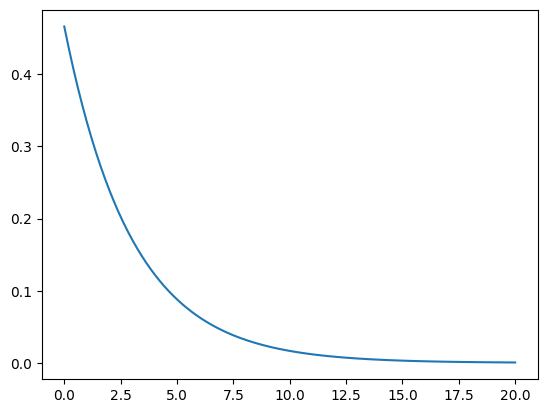

In [57]:
# using x and lambda above, lets view the pdf for one lambda and one x 
lambda_ = 3
x = 2
a = 1
b = 20

x = np.linspace(0, 20, 100) 
y = np.exp(-x / lambda_)/(Z(a, b, lambda_))

plt.plot(x, y)
plt.show()

Now we can fix x, and then view ${{P(x = 3| \lambda)}}$ for a range of lambdas

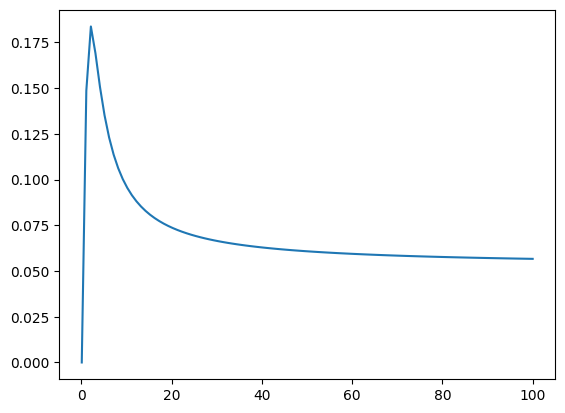

In [58]:

x = 3
lambdas =  np.linspace(0.1, 100, 100)
y = np.exp(-x / lambdas)/(Z(a, b, lambdas))
plt.plot(lambdas, y)
plt.show()


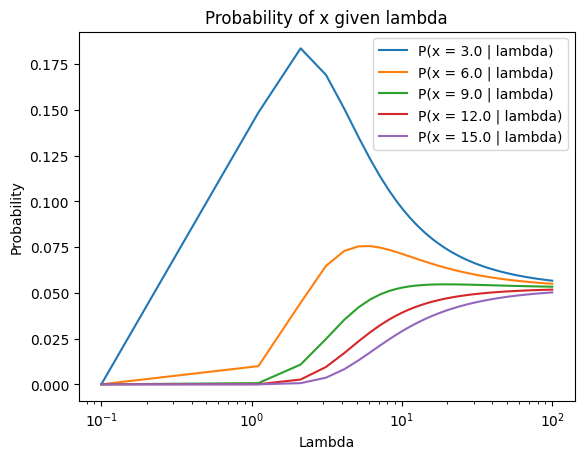

In [63]:
# lets do it now for multiple x's and view on same plot 
x_range = np.linspace(3, 15, 5)
lambdas =  np.linspace(0.1, 100, 100)
for x in x_range:
    y = np.exp(-x/lambdas)/(Z(a, b, lambdas))
    plt.plot(lambdas, y, label=f"P(x = {x} | lambda)")

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Probability')
plt.title('Probability of x given lambda')
plt.legend()

## What do you notice? ## 

All of these show that for a particular data point, there is
a particular value of lambda that makes it most probable! 

What bayesian inference does is take all the data points you have, calculate these
probabilities, and then multiply them together. If we are adjust our calculation
above slightly, you can see the resulting distribution as a function of lambda. 

(100,)


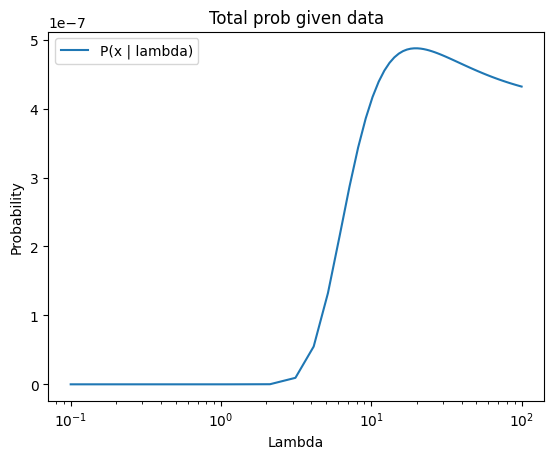

In [62]:
# lets do it now for multiple x's and view on same plot 
distributions = []
x_range = np.linspace(3, 15, 5)
lambdas =  np.linspace(0.1, 100, 100)
for x in x_range:
    y = np.exp(-x / lambdas)/(Z(a, b, lambdas))
    distributions.append(y)

total_prob = np.prod(distributions, axis=0)
print(total_prob.shape)

plt.plot(lambdas, total_prob, label=f"P(x | lambda)")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Probability')
plt.title('Total prob given data')
plt.legend()
plt.show()

Voila! we have a peak around lambda = 10. For this type of work I find it 
very helpful that we decided to view everything in parameter space, as it 
shows the crux of what bayesian inference is doing, infering over your parameters given data! 

# K Means Clustering #
Many classes of clustering algorithms boil down to assuming that each cluster 
is a gaussian, and thus data points would be sampled from a mixture of gaussians. 
The inference part is trying to figure out the parameters  of the gaussian mixtures! \n

For pedagogical purpposes we will start with a naive implementation and then
try to clean it up a bit


In [58]:
import numpy as np
import matplotlib.pyplot as plt

def distance_func(data, means): 
    return np.sqrt(((data - means[:, np.newaxis])**2).sum(axis=2))

def responsibility(data, means):
    # 'hard' k means assignment here where it is all allocated to particular mean or not 
    distances = distance_func(data, means)
    return np.argmin(distances, axis=0) 



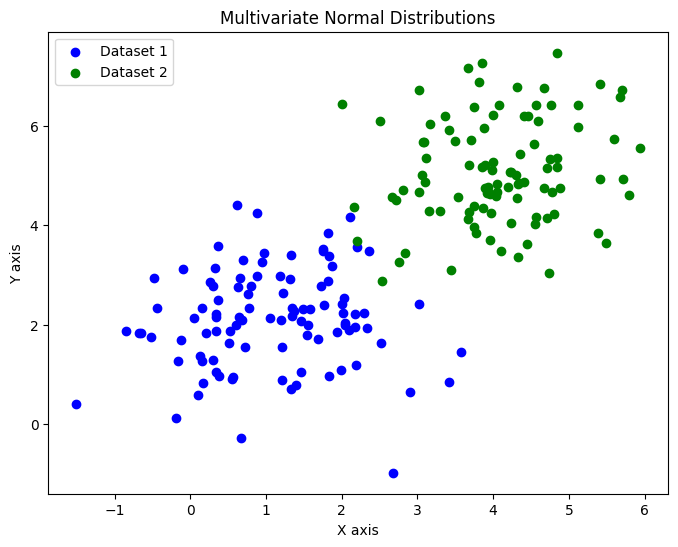

/var/folders/2j/t3pflg8s6gz_8_37kf_zrjqh0000gn/T/ipykernel_85462/2380004855.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[j] = resp


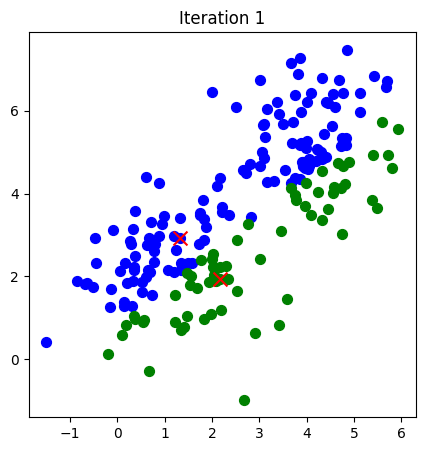

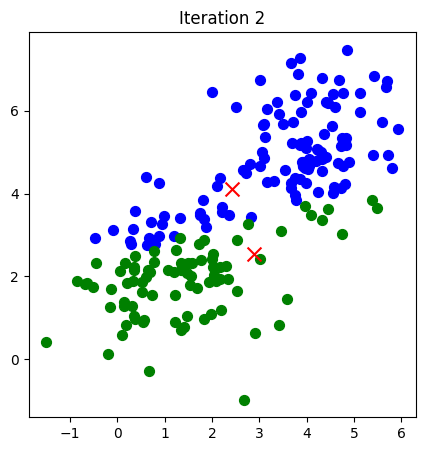

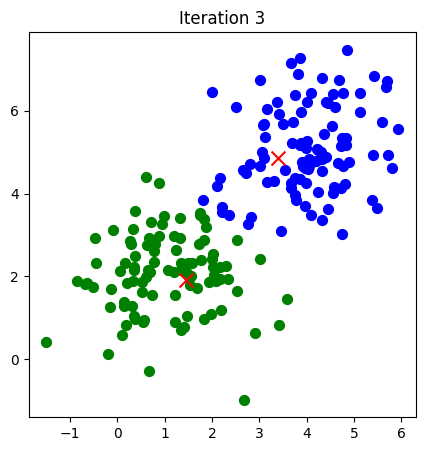

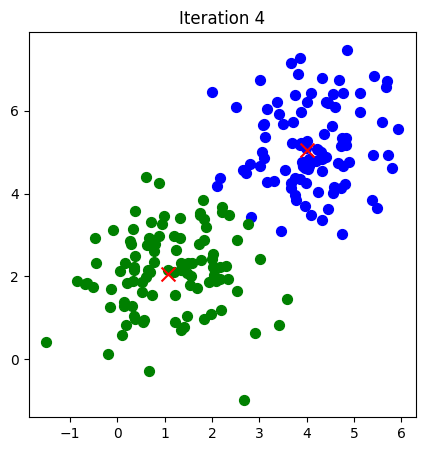

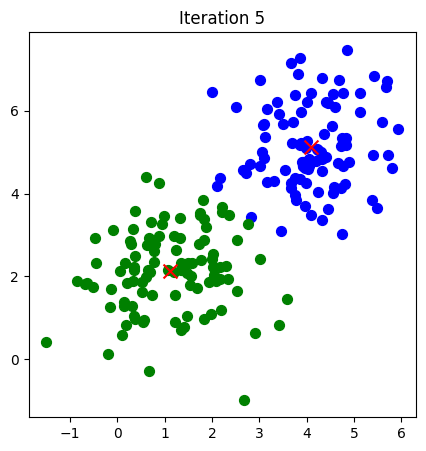

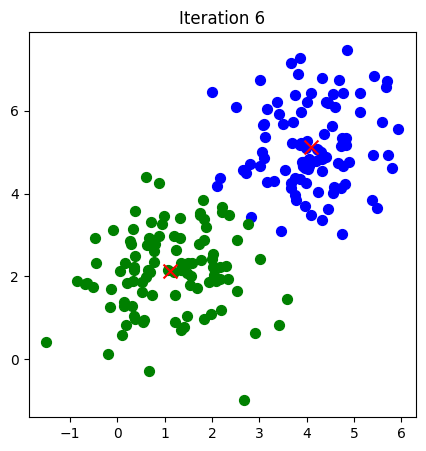

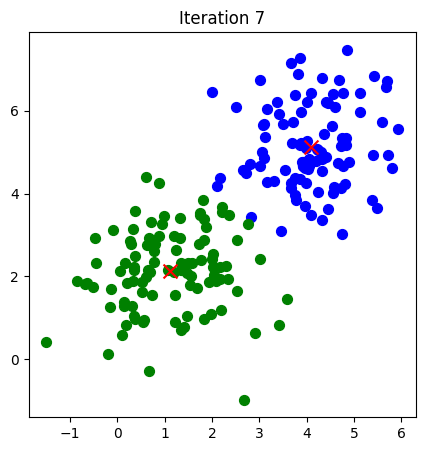

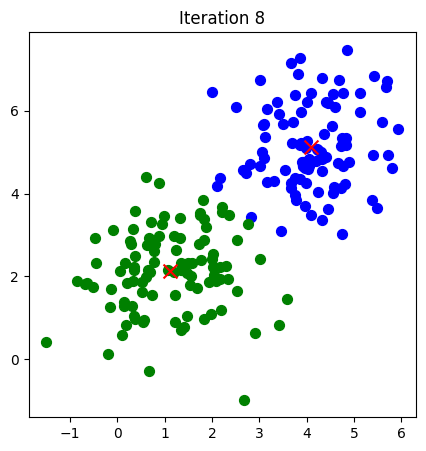

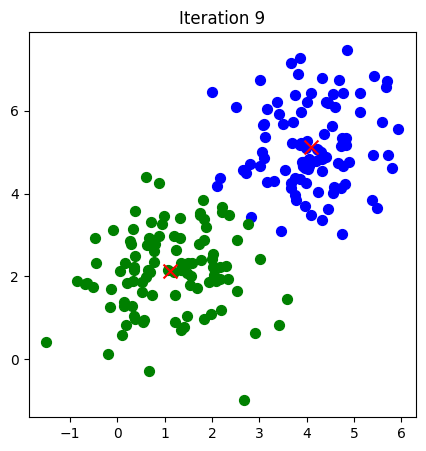

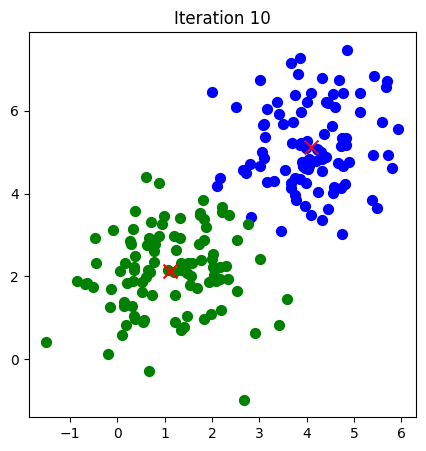

means from k means clustering = [[4.08819805 5.12361759]
 [1.11734123 2.1265061 ]]

actual means used to generate date = [array([1, 2]), array([4, 5])]


In [61]:
def run_k_means(k, iterations, num_samples, color_dict):
    # generate data 
    m1 = np.array([1, 2])
    m2 = np.array([4, 5])
    variance = 1
    # Generate data points from the first Gaussian distribution
    data1 = np.random.multivariate_normal(m1, variance*np.eye(2), size=num_samples)
    data2 = np.random.multivariate_normal(m2, variance*np.eye(2), size=num_samples)

    # plot actual distributions 
    plt.figure(figsize=(8, 6))
    plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Dataset 1')
    plt.scatter(data2[:, 0], data2[:, 1], color='green', label='Dataset 2')
    plt.title('Multivariate Normal Distributions')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.legend()
    plt.show()

    # Combine the data points from both distributions
    data = np.concatenate((data1, data2))
    labels = np.zeros(num_samples * 2)
    # generate random means and run initial assignment 
    means = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for i in range(iterations):
        plt.figure(figsize=(5, 5))
        for j in range(len(data)):
            resp = responsibility(data[j], means)
            labels[j] = resp
           
        for j in range(k):
            color = color_dict[j]
            plt.scatter(*data[labels == j].T, color=color, s=50)
            plt.scatter(*means[j], color='red', s=100, marker='x')
        
        plt.title(f"Iteration {i+1}")
        plt.show(block=False)
        plt.pause(0.5)
        plt.close()

        for j in range(k):
            # update mean vector
            means[j] = np.mean(data[labels == j], axis=0)
        
    return means, data

color_dict = {0: 'blue', 1: 'green'}
means, data = run_k_means(2, 10, 100, color_dict)
print(f"means from k means clustering = {means}\n")
print(f"actual means used to generate date = {[np.array([1, 2]), np.array([4, 5])]}")

## Issue with K means ##

Ok this is a great start! Our algorithm converges on the cluster means 
with only a very small error to the true distribution after just 10 updates. 

However, there are cases where this algorithm won't work. We will examine these
and how to adjust k means to to adapt to the new cluster structures. 

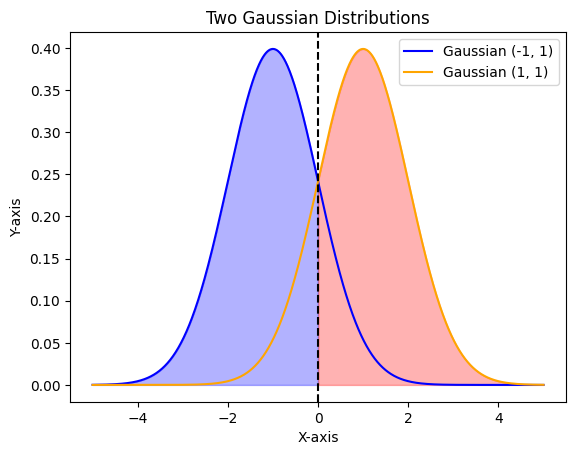

In [66]:
from scipy.stats import norm 

x = np.linspace(-5, 5, 1000)  # x-axis values

y1 = norm.pdf(x, loc=-1, scale=1)  # Gaussian centered at -1
y2 = norm.pdf(x, loc=1, scale=1)  # Gaussian centered at 1

# Plot the Gaussian distributions
plt.plot(x, y1, color='blue', label='Gaussian (-1, 1)')
plt.plot(x, y2, color='orange', label='Gaussian (1, 1)')

# Shade the areas under the curves
plt.fill_between(x, y1, where=(x < 0), color='blue', alpha=0.3)
plt.fill_between(x, y2, where=(x > 0), color='red', alpha=0.3)

# Add a vertical black line at x=0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Two Gaussian Distributions')
plt.legend()

plt.show()  # Display the

### Interpretation ###
In standard K means, we assume each data point comes from mixture of gaussians, 
where each individual gaussian has equal spherical standard deviation. We also
assume that each gaussian has an equal prior probability. 

With these assumptions, K means boils down to a MAP algorithm, finding us the maximum posterior probabilty for each
mean of the assumed gaussians. 

### Where  does this fall short? ### 
One example is the figure above, where under the above assumptions we would draw
our divider at 0. Then everything to the right would be assigned to one distribution
and everything to the left would be assigned to another. This means that _each_ MAP mean 
is shifted to the left or right because one tail is completely lost in the assignment. 

Another example is below where we have normal distributions that are clearly not isotropic 
This can cause a headache for our algorithm based on our assumptions. 

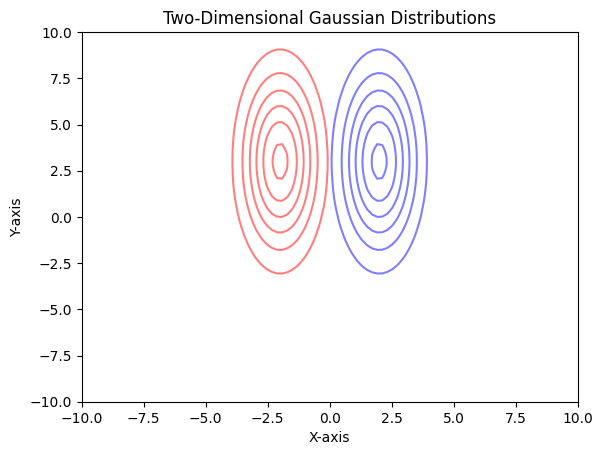

In [70]:
from scipy.stats import multivariate_normal

mean1 = np.array([2, 3])
mean2 = np.array([-2, 3])
cov1 = np.array([[1, 0], [0, 10]])
cov2 = np.array([[1, 0], [0, 10]])

# Create a grid of points
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Calculate the probability densities for each distribution
pdf1 = multivariate_normal.pdf(pos, mean=mean1, cov=cov1)
pdf2 = multivariate_normal.pdf(pos, mean=mean2, cov=cov2)

# Plot the Gaussian distributions
plt.contour(X, Y, pdf1, colors='blue', alpha=0.5)
plt.contour(X, Y, pdf2, colors='red', alpha=0.5)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Two-Dimensional Gaussian Distributions')

plt.show()  # Display the plot

### Soft K Means ### 
Our new algorithm will essentially incorporate a continuous distance measure for each 
of the means now vs the 'hard' measure previously that was either 0 or 1. So each mean will take 
_some_ responsibility for a data point, but it could easily be dominated by the closest. 
The new 'responsibility' function will look like this:
$$
r^{(n)}_k = \frac{e^{-\beta d(m^{(l)}, x^{(l)})}}{\sum_{k'} e^{-\beta d(m^{(l)}_{k'}, x^{(l)})}}
$$

Essentially for a given k, we measure it's distance via the numerator, and then 
loop through every k's distance to get a proportion between [0, 1]

$\beta$ here is a 'stifness' parameter. If you look closely and set $\beta$ = $ \frac{1}{\sigma^2} $ you see that we essentially are assigning a spherical gaussian of distance around each k. 

In [143]:
np.set_printoptions(suppress=True)

def distance_func(data, means): 
    return np.sum((data[np.newaxis, :, :] - means[:, np.newaxis])**2, axis=2)

def responsibility(data, means, beta): 
    # 'soft' k means assignment here where it is all allocated to particular mean or not 
    distances = distance_func(data, means)
    return np.exp(-beta * distances) / np.sum(np.exp(-beta * distances), axis=0)

m1 = np.array([1, 2])
m2 = np.array([4, 5])
variance = 1
beta = 2
# Generate data points from the first Gaussian distribution
data1 = np.random.multivariate_normal(m1, variance*np.eye(2), size=2)
data2 = np.random.multivariate_normal(m2, variance*np.eye(2), size=2)
data = np.concatenate((data1, data2))
print(f"data shape = {data.shape}")
print(f"data = {data}")

means = np.random.uniform(0, 5, (3, 2))
print(f"means shape = {means.shape}")
print(f"means = {means}")

distance = distance_func(data, means)
print(f"distance shape = {distance.shape}")
print(distance)
# means = data[np.random.choice(data.shape[0], 2, replace=False)]
# print(f"means shape = {means.shape}")
resp = responsibility(data, means, beta)
print(f"responsibility shape = {resp.shape}")
print(f"responsibilities = {resp}")

means = resp @ data / np.sum(resp, axis=1)[:, np.newaxis] 
print(f"new means = {means}")

# np.argmax(responsibility(data, means, beta), axis=0)

# as we vary beta, we can see how the responsibility changes
# bigger beta means 'harder' cut off for responsibility 
# for beta in [0.1, 1, 10]:
#     print(f"beta = {beta}")
#     print(responsibility(data, means, beta))
#     print(np.argmax(responsibility(data, means, beta), axis=0))
#     print('\n')

data shape = (4, 2)
data = [[-0.06955442  3.17403764]
 [-0.30372753  0.48055884]
 [ 5.23370813  3.62941513]
 [ 5.63955036  4.86043105]]
means shape = (3, 2)
means = [[0.633082   2.82433386]
 [4.80170274 0.26312788]
 [0.77531813 1.99115208]]
distance shape = (3, 4)
[[ 0.61599067  6.37089347 21.81391666 29.21041721]
 [32.20254191 26.11269448 11.5185185  21.83718506]
 [ 2.11302786  3.44623151 22.5611472  31.89351696]]
responsibility shape = (3, 4)
responsibilities = [[0.95230571 0.00287357 0.         0.00000039]
 [0.         0.         1.         0.9999996 ]
 [0.04769429 0.99712643 0.         0.        ]]
new meanbs = [[-0.07025654  3.16593526]
 [ 5.43662921  4.24492297]
 [-0.29303791  0.60351158]]


if you think about, if we make Beta very large, based on our formulation earlier $\beta$ = $ \frac{1}{\sigma^2} $ we are essentially
shrinking the variance (and range) of our 'responsibility' gaussians, as $\beta \rightarrow \infty$ you recover the hard k means algorithm which assigns the mean
to point rather than region. 

Let's modify our function slightly to run the new soft k means. 

In [147]:
import matplotlib.patches as patches

def run_soft_k_means(k, iterations, num_samples, color_dict):
    # generate data 
    m1 = np.array([1, 2])
    m2 = np.array([4, 5])
    variance = 1
    beta = 2
    # Generate data points from the first Gaussian distribution
    data1 = np.random.multivariate_normal(m1, variance*np.eye(2), size=num_samples)
    data2 = np.random.multivariate_normal(m2, variance*np.eye(2), size=num_samples)

    # plot actual distributions 
    plt.figure(figsize=(5, 5))
    plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Dataset 1')
    plt.scatter(data2[:, 0], data2[:, 1], color='green', label='Dataset 2')
    plt.title('Actual Multivariate Normal Distributions')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.legend()
    plt.show()

    # Combine the data points from both distributions
    data = np.concatenate((data1, data2))
    labels = np.zeros(num_samples * 2)
    means = np.random.uniform(0, 10, (k, 2))
    
    for i in range(iterations):
        plt.figure(figsize=(5, 5))
        ax = plt.gca()   
        
        resp = responsibility(data, means, beta)
        labels = np.argmax(resp, axis=0)

        for j in range(k):
            color = color_dict[j]
            plt.scatter(*data[labels == j].T, color=color, s=50)
            circle = patches.Circle(means[j], 1/beta, alpha=0.5, edgecolor='r', facecolor='blue')
            ax.add_patch(circle)
        
        plt.title(f"Iteration {i+1}")
        plt.show(block=False)
        plt.pause(0.5)
        plt.close()
        
        # update means
        means = resp @ data / np.sum(resp, axis=1)[:, np.newaxis] 
        

    return means, data


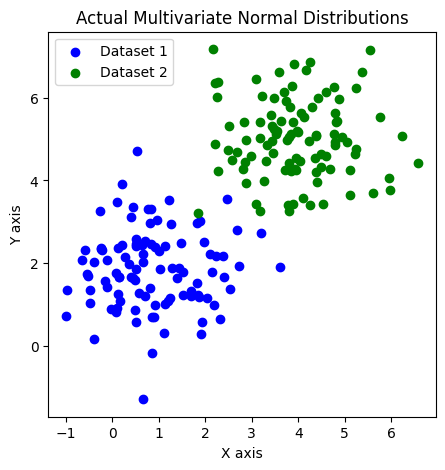

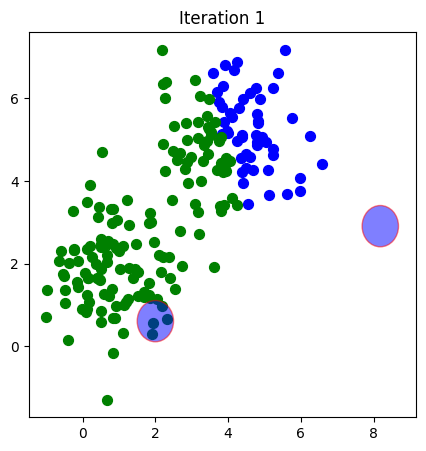

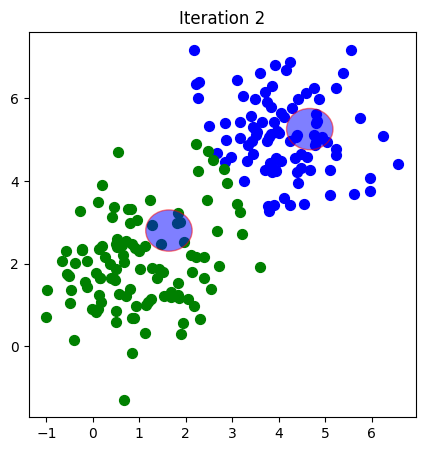

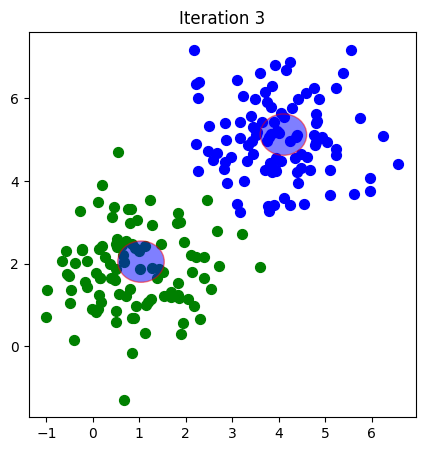

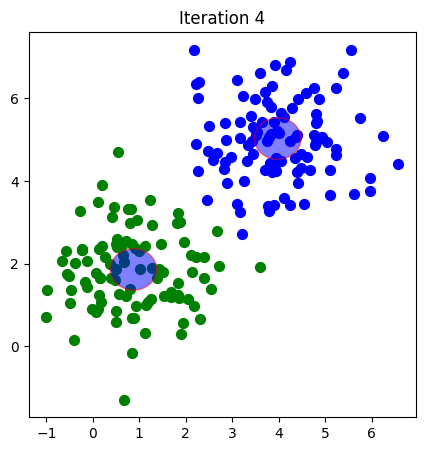

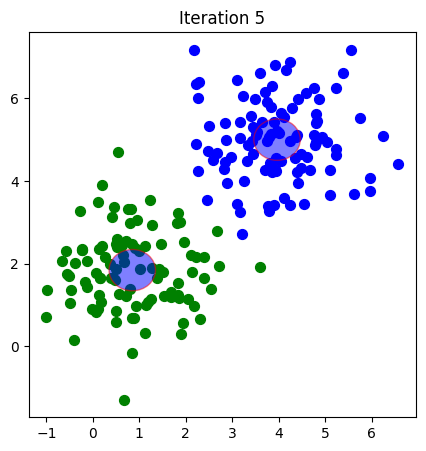

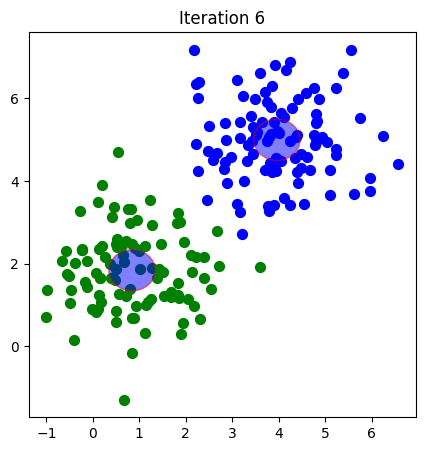

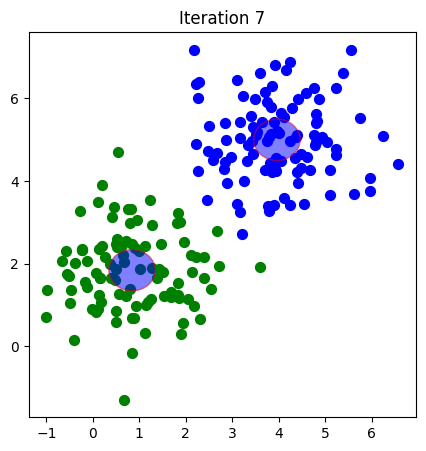

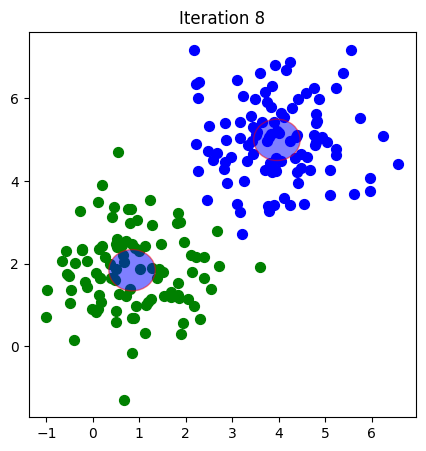

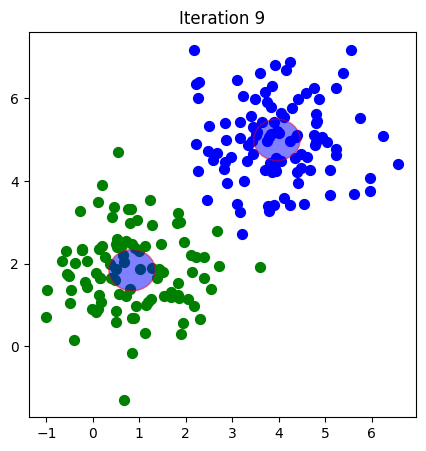

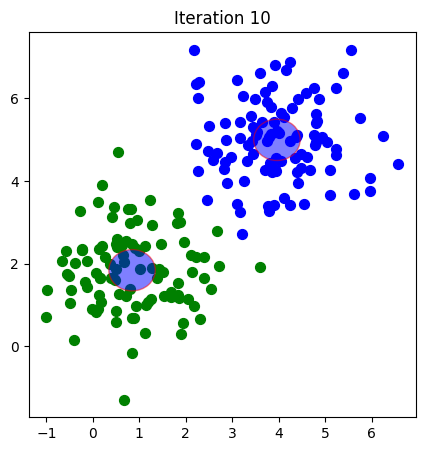

In [149]:
color_dict = {0: 'blue', 1: 'green'}
means, data = run_soft_k_means(2, 10, 100, color_dict)

Not so shabby! Now we can explore with how changing our 'stiffness' parameter
$\beta$ effects our assignment rule. One good way would be to start with small $\beta$ (large stdev) and then each M iterations 
increase it so the circles get tighter and tighter as we go    

In [158]:
import matplotlib.patches as patches

def run_soft_k_means(k, iterations, num_samples, color_dict):
    # generate data 
    m1 = np.array([1, 2])
    m2 = np.array([4, 5])
    variance = 1
    beta = 0.1
    # Generate data points from the first Gaussian distribution
    data1 = np.random.multivariate_normal(m1, variance*np.eye(2), size=num_samples)
    data2 = np.random.multivariate_normal(m2, variance*np.eye(2), size=num_samples)

    # plot actual distributions 
    plt.figure(figsize=(5, 5))
    plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Dataset 1')
    plt.scatter(data2[:, 0], data2[:, 1], color='green', label='Dataset 2')
    plt.title('Actual Multivariate Normal Distributions')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.legend()
    plt.show()

    # Combine the data points from both distributions
    data = np.concatenate((data1, data2))
    labels = np.zeros(num_samples * 2)
    means = np.random.uniform(0, 10, (k, 2))
    
    for i in range(iterations):
        if i % 2 == 0: 
            print(f"Adjusting beta from {beta} to {beta * 3}")
            beta *= 2
        plt.figure(figsize=(5, 5))
        ax = plt.gca()   
        
        resp = responsibility(data, means, beta)
        labels = np.argmax(resp, axis=0)

        for j in range(k):
            color = color_dict[j]
            plt.scatter(*data[labels == j].T, color=color, s=50)
            circle = patches.Circle(means[j], 1/beta, alpha=0.5, edgecolor='r', facecolor='blue')
            ax.add_patch(circle)
        
        plt.title(f"Iteration {i+1}")
        plt.show(block=False)
        plt.pause(0.5)
        plt.close()
        
        # update means
        means = resp @ data / np.sum(resp, axis=1)[:, np.newaxis] 
        

    return means, data


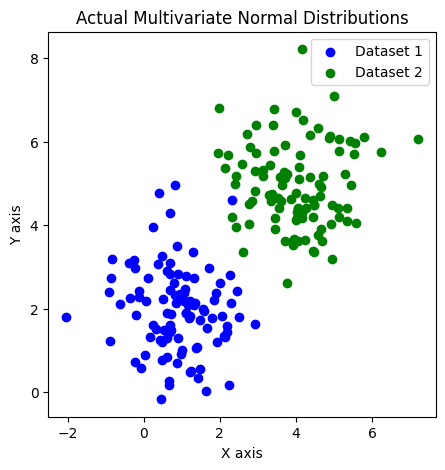

Adjusting beta from 0.1 to 0.30000000000000004


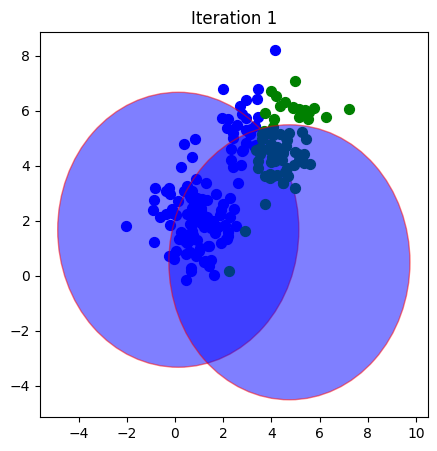

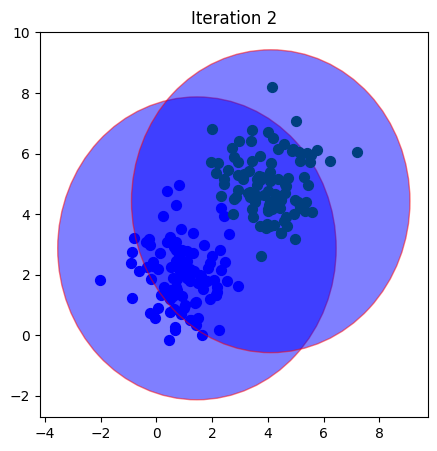

Adjusting beta from 0.2 to 0.6000000000000001


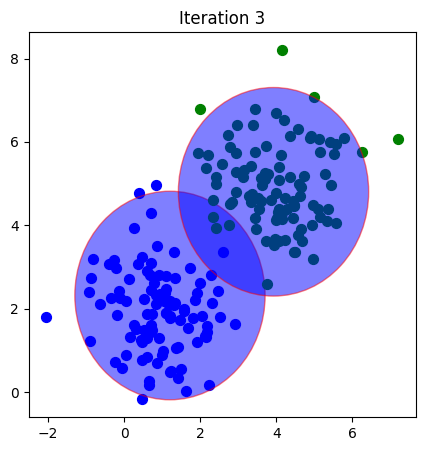

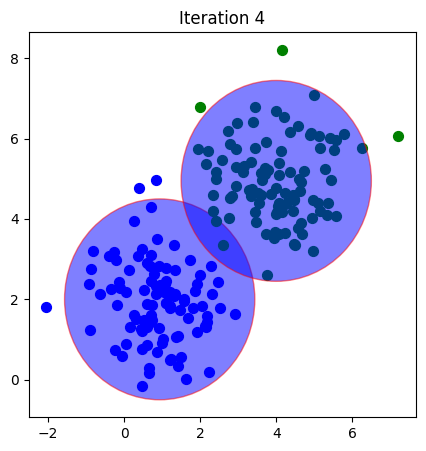

Adjusting beta from 0.4 to 1.2000000000000002


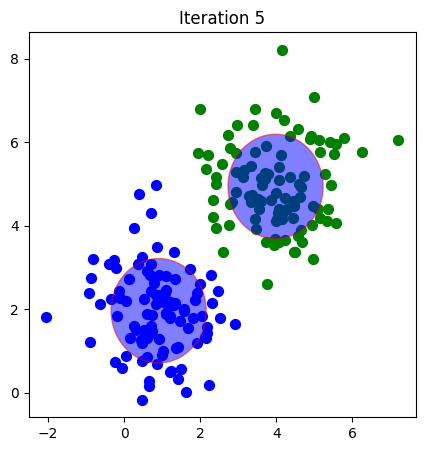

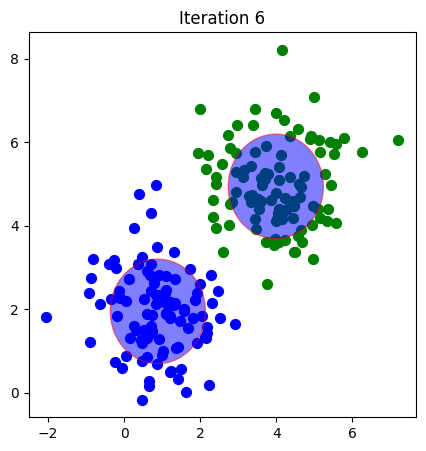

Adjusting beta from 0.8 to 2.4000000000000004


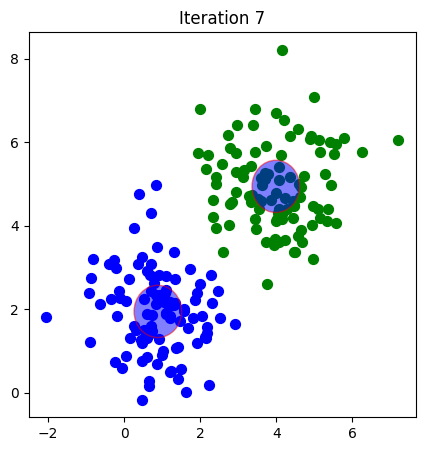

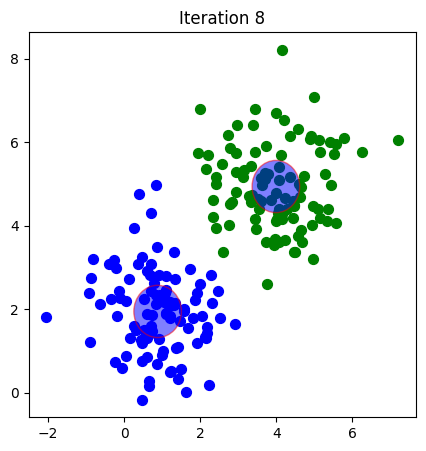

Adjusting beta from 1.6 to 4.800000000000001


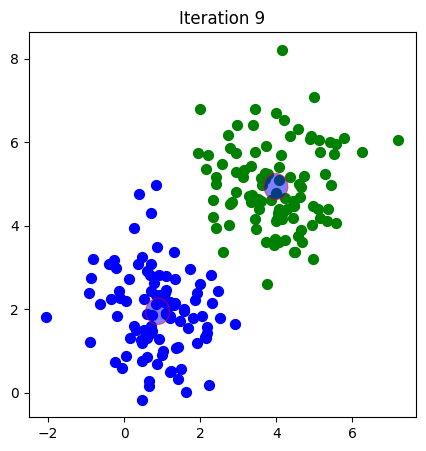

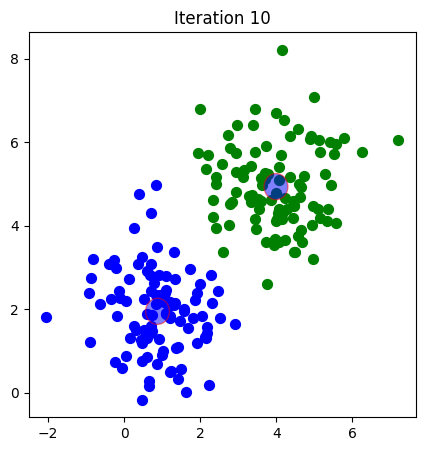

In [159]:
color_dict = {0: 'blue', 1: 'green'}
means, data = run_soft_k_means(2, 10, 100, color_dict)